# Project 2: Clustering

In [70]:
# Import all needed library needed
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import text
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1 

In [22]:
# Importing the two class data & 
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

# list of category indices of the documents
# Since we want to do 2 classes instead of 8 categories
labels = dataset.target // 4 

# Transforming the documents into TF-IDF
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=3, stop_words=stop_words)
tfidf_dataset = vectorizer.fit_transform(dataset.data)

print ("n_samples: %d, n_features: %d" % tfidf_dataset.shape) # dimensions are (7882, 27768)


n_samples: 7882, n_features: 27768


## Part 2

In [14]:
# K-clustering 
# n_cluster = k = 2 since there are two classes we are looking at
km = KMeans(n_clusters=2, n_init = 30).fit(tfidf_dataset)


# labels are the actual cluster
# km.labels_ are the predicted cluster
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))


Confusion Matrix is  [[3899    4]
 [2262 1717]]
Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted Rand-Index: 0.181
Adjusted Mutual info score: 0.253


## Part 3

### (a - i) Variance

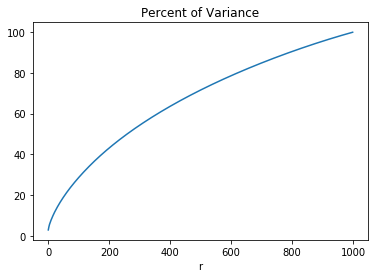

In [43]:
def calculate_svd_variance(tfidf):
    x_svd = TruncatedSVD(n_components = 1000) # n_components is desired dimensionality of output data
    x_svd.fit_transform(tfidf) # Transform the data
    singular_values_squared = np.square(x_svd.singular_values_) 
    sum_sv = 0
    var = []
    for i in singular_values_squared:
        sum_sv = sum_sv+i
        var.append(sum_sv)
    
    r = list(xrange(1000))
    plt.figure(1)
    plt.plot(np.cumsum(singular_values_squared)/np.sum(singular_values_squared)*100)
    plt.title('Percent of Variance')
    plt.xlabel('r')
    
calculate_svd_variance(tfidf_dataset)

### (a-ii) SVD

Calculating SVD for dimension, r =   1
Confusion Matrix is  [[1717 2186]
 [1674 2305]]
Calculating SVD for dimension, r =   2
Confusion Matrix is  [[3700  203]
 [ 440 3539]]
Calculating SVD for dimension, r =   3
Confusion Matrix is  [[3861   42]
 [1285 2694]]
Calculating SVD for dimension, r =   5
Confusion Matrix is  [[3898    5]
 [2441 1538]]
Calculating SVD for dimension, r =   10
Confusion Matrix is  [[3899    4]
 [2367 1612]]
Calculating SVD for dimension, r =   20
Confusion Matrix is  [[   3 3900]
 [1618 2361]]
Calculating SVD for dimension, r =   50
Confusion Matrix is  [[   3 3900]
 [1639 2340]]
Calculating SVD for dimension, r =   100
Confusion Matrix is  [[   3 3900]
 [1662 2317]]
Calculating SVD for dimension, r =   300
Confusion Matrix is  [[   4 3899]
 [1684 2295]]


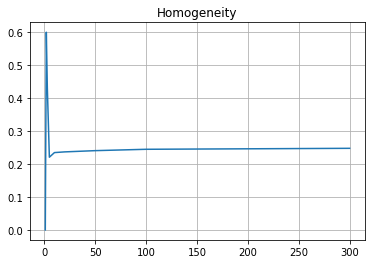

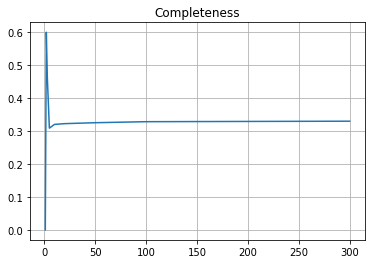

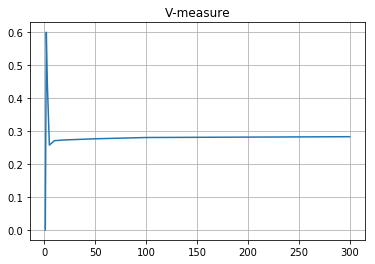

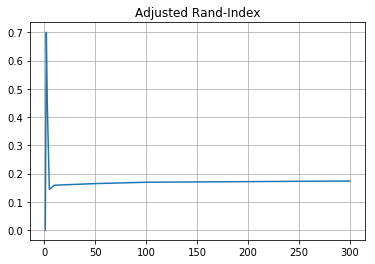

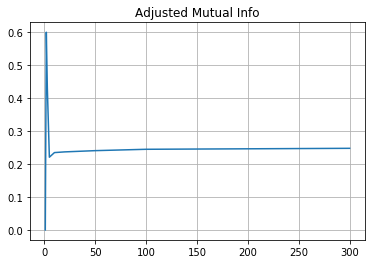

In [15]:
def calculate_SVD_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating SVD for dimension, r =  ", n
        x_svd = TruncatedSVD(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_svd)
        
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_SVD_score(tfidf_dataset, labels)

### (a - ii) NMF

Calculating NMF for dimension, r =   1
Confusion Matrix is  [[1703 2200]
 [1656 2323]]
Calculating NMF for dimension, r =   2
Confusion Matrix is  [[ 309 3594]
 [3821  158]]
Calculating NMF for dimension, r =   3
Confusion Matrix is  [[3899    4]
 [2396 1583]]
Calculating NMF for dimension, r =   5
Confusion Matrix is  [[3898    5]
 [2677 1302]]
Calculating NMF for dimension, r =   10
Confusion Matrix is  [[3899    4]
 [2618 1361]]
Calculating NMF for dimension, r =   20
Confusion Matrix is  [[  22 3881]
 [1397 2582]]
Calculating NMF for dimension, r =   50
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   100
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   300
Confusion Matrix is  [[3628  275]
 [3976    3]]


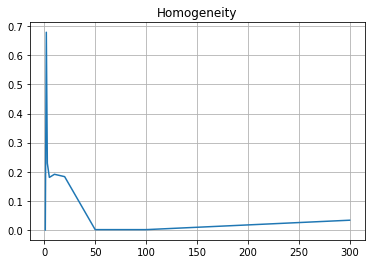

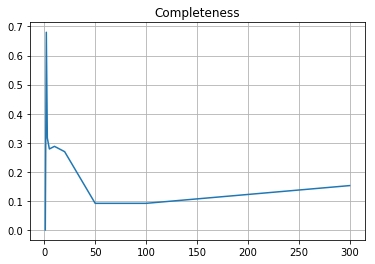

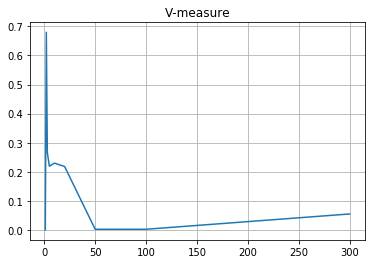

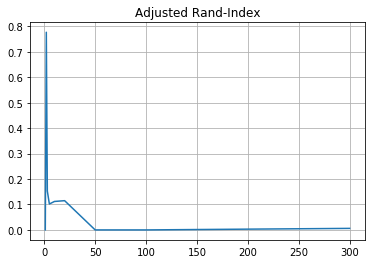

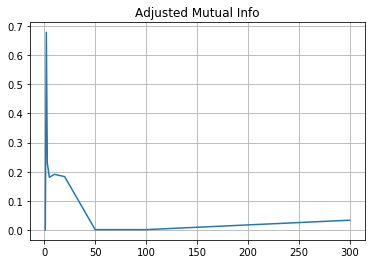

In [46]:
def calculate_NMF_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating NMF for dimension, r =  ", n
        x_nmf = NMF(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)
        
        # For some reason, x, y position of matrix is switched in the solution
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_NMF_score(tfidf_dataset, labels)

## Part 4
### (a) SVD

In [51]:
# We picked the best to be 2
r = 2
x_svd = TruncatedSVD(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_svd = KMeans(n_clusters=2, n_init = 30).fit(x_svd)

Text(0.5,1,u'K-mean (predicted) Clustering')

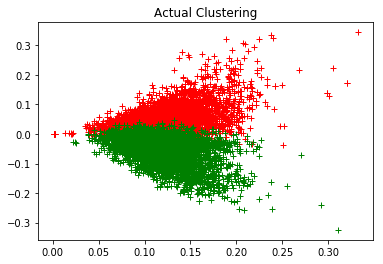

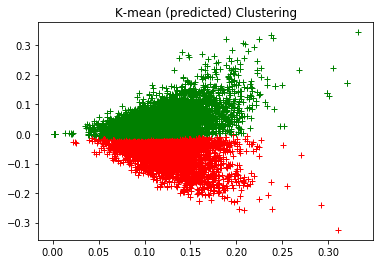

In [63]:
# Visualizition SVD (Actual)
x1 = x_svd[labels == 0][:,0]
y1 = x_svd[labels == 0][:,1]

x2 = x_svd[labels == 1][:,0]
y2 = x_svd[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition SVD K-clustering (Predicted)
x1 = x_svd[km_svd.labels_ == 0][:,0]
y1 = x_svd[km_svd.labels_ == 0][:,1]

x2 = x_svd[km_svd.labels_ == 1][:,0]
y2 = x_svd[km_svd.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')


In [101]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_svd.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_svd.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_svd.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_svd.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_svd.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_svd.labels_))


Confusion Matrix is  [[ 186 3717]
 [3474  505]]
Homogeneity: 0.582
Completeness: 0.585
V-measure: 0.583
Adjusted Rand-Index: 0.680
Adjusted Mutual info score: 0.582


### (a) NMF

In [67]:
# We picked the best to be 2
r = 2
x_nmf = NMF(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_nmf = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)

Text(0.5,1,u'K-mean (predicted) Clustering')

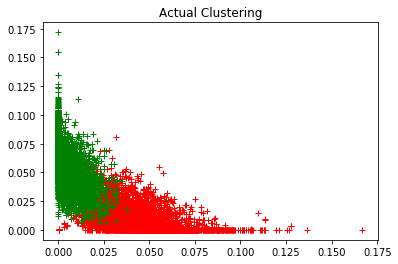

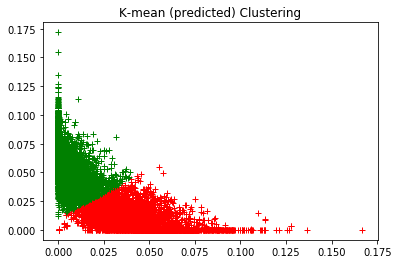

In [68]:
# Visualizition NMF (Actual)
x1 = x_nmf[labels == 0][:,0]
y1 = x_nmf[labels == 0][:,1]

x2 = x_nmf[labels == 1][:,0]
y2 = x_nmf[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition NMF K-clustering (Predicted)
x1 = x_nmf[km_nmf.labels_ == 0][:,0]
y1 = x_nmf[km_nmf.labels_ == 0][:,1]

x2 = x_nmf[km_nmf.labels_ == 1][:,0]
y2 = x_nmf[km_nmf.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')

In [84]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_nmf.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_nmf.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_nmf.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_nmf.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_nmf.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_nmf.labels_))


Confusion Matrix is  [[3594  309]
 [ 158 3821]]
Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual info score: 0.679


### (b) Normalizing Features (SVD)

Confusion Matrix is  [[ 205 3698]
 [3528  451]]
Homogeneity: 0.594
Completeness: 0.595
V-measure: 0.594
Adjusted Rand-Index: 0.695
Adjusted Mutual info score: 0.593


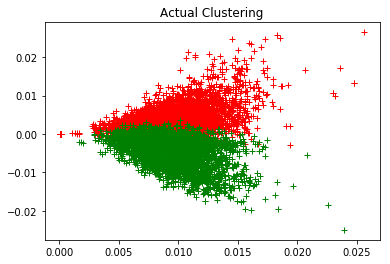

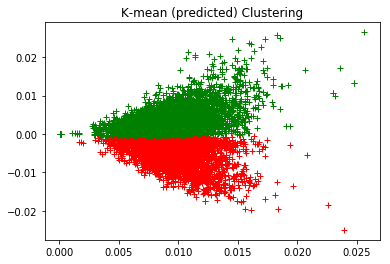

In [113]:
def calculate_normalized_score(svd, labels):
    x_svd_norm = svd/np.sqrt(np.sum(svd**2))
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_svd_norm)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_svd_norm[labels == 0][:,0]
    y1 = x_svd_norm[labels == 0][:,1]

    x2 = x_svd_norm[labels == 1][:,0]
    y2 = x_svd_norm[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_svd_norm[km.labels_ == 0][:,0]
    y1 = x_svd_norm[km.labels_ == 0][:,1]

    x2 = x_svd_norm[km.labels_ == 1][:,0]
    y2 = x_svd_norm[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_svd, labels)

### (b) Normalizing Features (NMF)

Confusion Matrix is  [[ 309 3594]
 [3821  158]]
Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual info score: 0.679


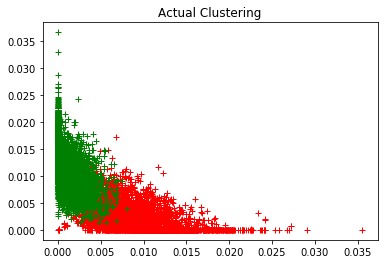

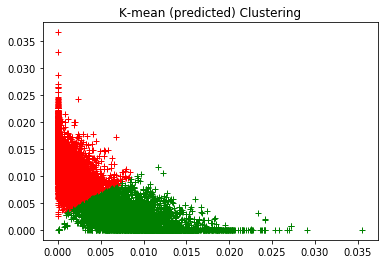

In [114]:
def calculate_normalized_score(nmf, labels):
    x_nmf_log = nmf/np.sqrt(np.sum(nmf**2))
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

### (b) Non-Linear Transformation

Confusion Matrix is  [[ 212 3691]
 [3796  183]]
Homogeneity: 0.713
Completeness: 0.713
V-measure: 0.713
Adjusted Rand-Index: 0.810
Adjusted Mutual info score: 0.713


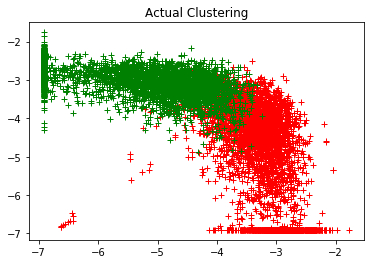

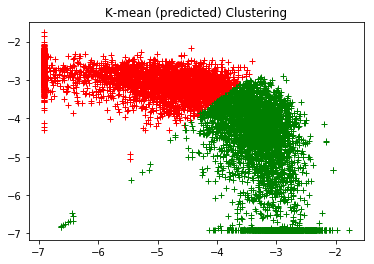

In [127]:
def calculate_nonlinear_score(nmf, labels):
    x_nmf_log = np.log(nmf+0.001) # add constant
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_nonlinear_score(x_nmf, labels)

### (b) Normalize then Log

Confusion Matrix is  [[ 340 3563]
 [3869  110]]
Homogeneity: 0.693
Completeness: 0.696
V-measure: 0.694
Adjusted Rand-Index: 0.785
Adjusted Mutual info score: 0.693


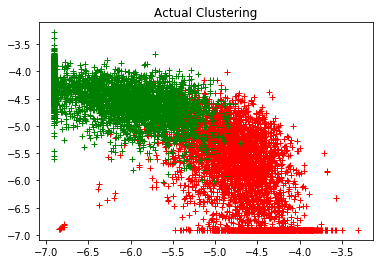

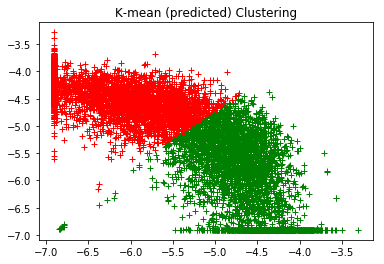

In [120]:
def calculate_normalized_score(nmf, labels):
    x_nmf_norm = nmf/np.sqrt(np.sum(nmf**2))
    x_nmf_log = np.log(x_nmf_norm+0.001) # add constant so 
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

### (b) log then normalize

Confusion Matrix is  [[ 384 3519]
 [3869  110]]
Homogeneity: 0.674
Completeness: 0.677
V-measure: 0.675
Adjusted Rand-Index: 0.765
Adjusted Mutual info score: 0.674


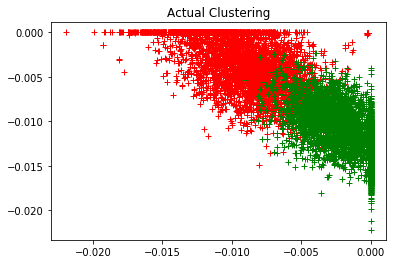

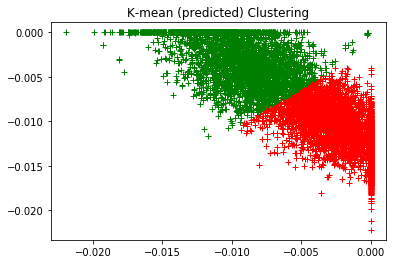

In [125]:
def calculate_normalized_score(nmf, labels):
    x_nmf_log = nmf* np.log(nmf+0.001) # add constant so 
    x_nmf_log = x_nmf_log/np.sqrt(np.sum(x_nmf_log**2))
    
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

## Part 5

In [129]:
# Importing the two class data & 
twenty_dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42) # if categories are blank, then automatically all categories are loaded

# list of category indices of the documents
labels_20 = twenty_dataset.target  

# Transforming the documents into TF-IDF
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=3, stop_words=stop_words)
tfidf_dataset_20 = vectorizer.fit_transform(twenty_dataset.data)

print ("n_samples: %d, n_features: %d" % tfidf_dataset_20.shape) # dimensions are (7882, 27768)


n_samples: 18846, n_features: 52295


## SVD

Calculating SVD for dimension, r =   1
Confusion Matrix is  [[ 51  47  82  14   5  64  44  20  68   0  21  24  66   1   0  79  89  12
   31  81]
 [  8 110  50  71   3  68 119   3  29  25  99   5  92  46   2  24  55   2
  120  42]
 [ 29  93  75  47   0 107  94   4  36  23  50  16  98  20   0  38 116   3
   75  61]
 [ 31  92  86  51   0  94  79   2  63   3  73  13 105  28   0  31  84   1
   94  52]
 [ 24 101  73  42   3  97 100   1  48   2  72   7  85  35   0  37  84   2
   92  58]
 [  5  82  50 106   7  80 107   1  23  18 130   5  78  83   0  16  52   1
  115  29]
 [ 10 107  70  95   1  81 127   0  28   6  99   3  79  59   0   9  54   0
  109  38]
 [ 26  95  74  60   1  95  84   9  53   2  81  14 104  28   0  33 105   1
   75  50]
 [ 10 104  70  44   0 118 117   2  31   0  78   6 130  17   0  38  85   0
  101  45]
 [ 18 107 106  41   1  91  88   8  48   6  61  21  76  27   0  39  92   1
   85  78]
 [ 11  95  85  55   1 106  92   5  46  10  82  11  94  45   0  28  87   1
   89  56]
 [ 56

Confusion Matrix is  [[  0 152   0   0   0   1   1 157   0   0  68   0 145  55 163   0  19   1
   37   0]
 [275   0   0   0   0  21   0   7   2   0 136   0   1  70 451   2   7   1
    0   0]
 [651   0   0   0  11   3   0   7  11   0  76   0   0  16 194   2  14   0
    0   0]
 [189   0   0   0 201  14   0   1   4   0 199   4   0  23 314   3  30   0
    0   0]
 [ 67   0   0   0  80  11   0   8   1   0 145   1   0  20 593  13  24   0
    0   0]
 [345   0   0   0   0  32   4   2   1   0 202   0   0  64 332   2   4   0
    0   0]
 [ 44   0   0   0  55   4   0   6   7   0 189  14   0   5 601  34  13   3
    0   0]
 [  2   1   0   0   0  14   0 108   0   0 464   0   0  20 328  31  20   2
    0   0]
 [  0   0   0   0   0  20   0  39   1   0 589   1   0  79 251   7   9   0
    0   0]
 [  0   0   0   0   0   4   0  28   1   0 154 411   0   2 382   7   1   4
    0   0]
 [  0   0   0   0   0   5   0   3   0   0  47 780   0   2 151   6   5   0
    0   0]
 [ 15   0   0   0   0   9 501  72  31   0 17

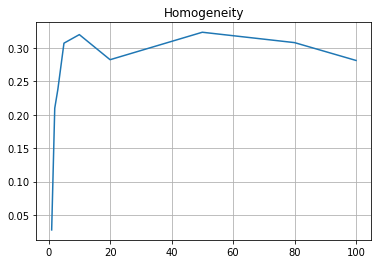

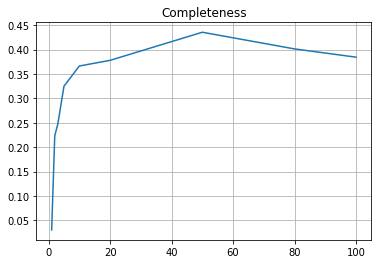

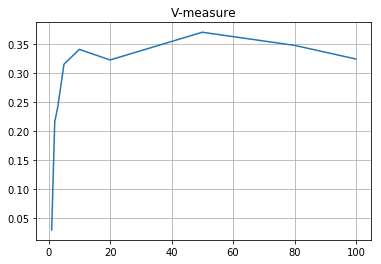

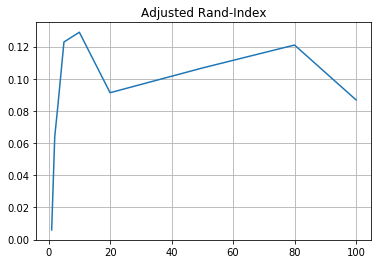

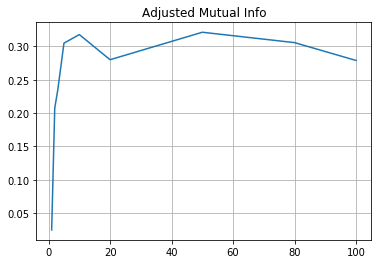

In [131]:
def calculate_SVD_score_20(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 80, 100] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating SVD for dimension, r =  ", n
        x_svd = TruncatedSVD(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=20, n_init = 30).fit(x_svd)
        
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_SVD_score_20(tfidf_dataset_20, labels_20)

## NMF

In [ ]:
def calculate_NMF_score_20(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating NMF for dimension, r =  ", n
        x_nmf = NMF(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=20, n_init = 30).fit(x_nmf)
        
        # For some reason, x, y position of matrix is switched in the solution
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_NMF_score_20(tfidf_dataset_20, labels_20)

Calculating NMF for dimension, r =   1
Confusion Matrix is  [[ 39  20  84  59   1  82  88  20  52   5  72  22   0  52  69  23  12  93
    0   6]
 [120   2  42 101  44  24  71  89   9   3  79   5  17 123  30  92   2  54
    2  64]
 [ 93   4  62 105  16  40 128  41  27   0 109  16  22  99  36  52   3  87
    0  45]
 [ 87   2  55 110  20  32  96  58  34   0 108  10   2  90  63  80   1  92
    0  42]
 [ 96   1  65 102  30  38  97  57  24   3 108   7   1 102  47  75   2  72
    0  36]
 [118   1  31  89  70  16  70 102   5   7  78   5  14  99  24 105   1  52
    0 101]
 [118   0  42 100  55   9  60  94  10   1  93   3   2 118  28  96   0  72
    0  74]
 [ 75   9  53 113  22  33 111  65  28   1 110  12   1  92  54  71   1  86
    0  53]
 [100   2  49 150  15  40  93  65  10   0 133   6   0 114  30  82   0  73
    0  34]
 [ 89   8  79  91  22  39 100  46  22   1  94  17   5 110  50  65   1 115
    0  40]
 [ 80   4  55 110  38  28  96  58  14   1 101   9   7 105  48  89   1 101
    0  54]
 [ 45

Confusion Matrix is  [[  0   0   0  38 183 138   0   0 154 131   0   1   0  15   1  70  64   2
    2   0]
 [325   0   0   0  19   1   0   0 399   0   0   0   0   7   2  82 119   1
   16   2]
 [651   0   0   0  10   0   0   0 182   0   0   0  11  15  12  35  65   0
    2   2]
 [203   4   0   0   5   0   0   0 318   0   0   0 200  28   4  29 178   0
   10   3]
 [ 90   1   0   0  13   0   0   0 586   0   0   0  82  23   1  24 119   0
   10  14]
 [388   0   0   0   3   0   0   0 313   0   0   5   0   4   2  87 157   0
   27   2]
 [ 52  14   0   0  17   0   0   0 607   0   0   0  59  14   7   5 158   5
    4  33]
 [  3   1   0   0 231   0   0   0 318   0   0   0   0  21   0  27 344   3
   11  31]
 [  0   2   0   0 110   0   0   0 267   0   0   0   0   9   1 108 476   0
   17   6]
 [  0 381   0   0  26   0   0   0 422   0   0   0   0   1   1   2 146   4
    4   7]
 [  0 776   0   0   2   0   0   0 168   0   0   0   0   5   0   2  36   0
    4   6]
 [ 15   0   1   0  80   0   0   0 143   0   